In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("Advertising.csv")
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
dataset=dataset.iloc[:,1:]
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


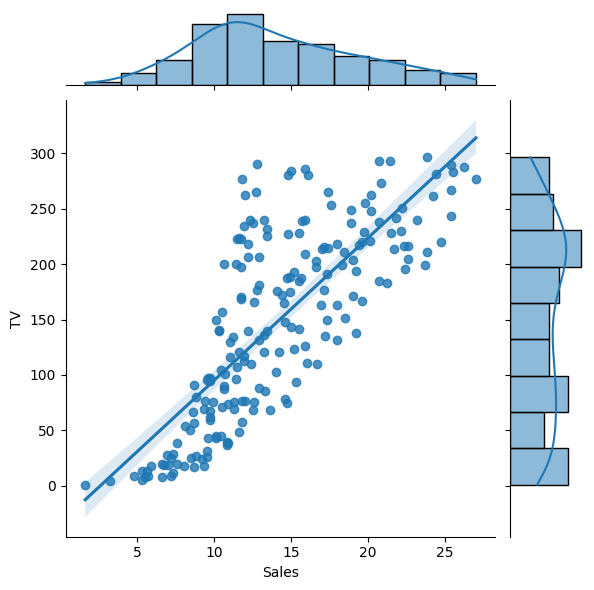

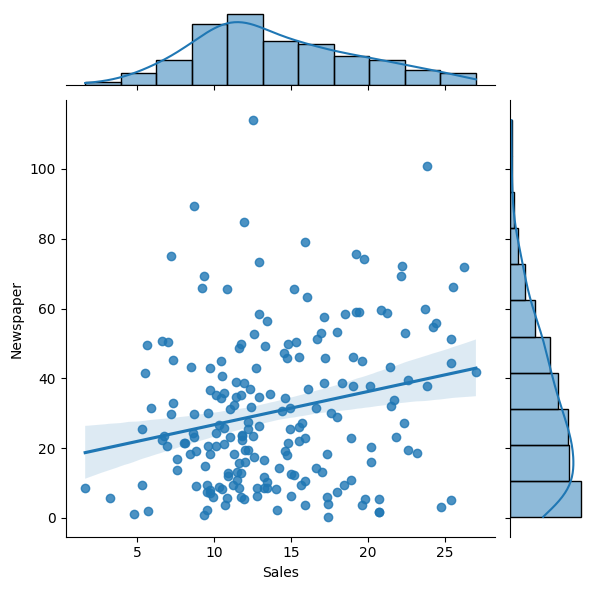

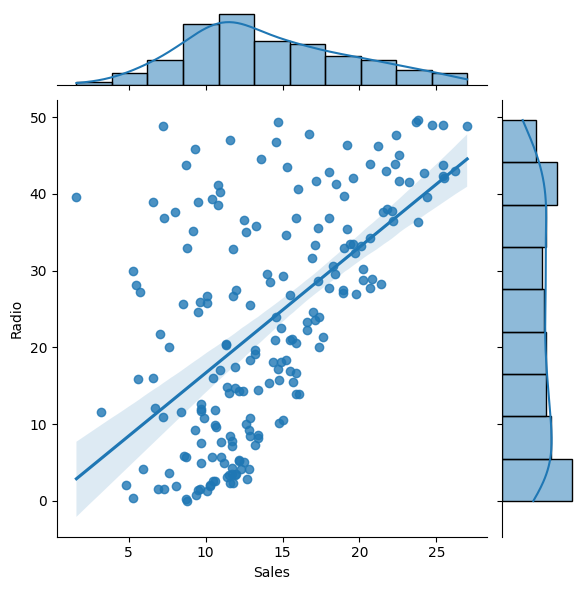

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x='Sales',y='TV',data=dataset,kind='reg')
sns.jointplot(x='Sales',y='Newspaper',data=dataset,kind='reg')
sns.jointplot(x='Sales',y='Radio',data=dataset,kind='reg')

<Axes: xlabel='Sales', ylabel='Count'>

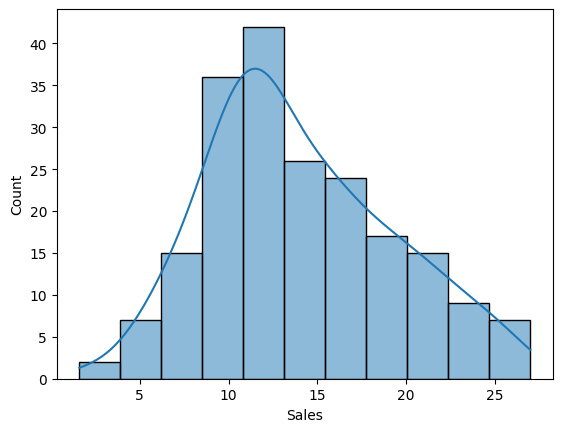

In [4]:
sns.histplot(dataset['Sales'],kde=True)

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
ac=StandardScaler()
train_x[:,:]=ac.fit_transform(train_x[:,0:])
test_x=ac.transform(test_x[:,0:])


In [7]:
# from sklearn.linear_model import LinearRegression
# l=LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# l=DecisionTreeRegressor(random_state=0)


# from sklearn.svm import SVR
# l=SVR()

from sklearn.ensemble import RandomForestRegressor
l=RandomForestRegressor(n_estimators=10, random_state=0)


l.fit(train_x,train_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
y_pred=l.predict(test_x)
# print(y_pred)
y=np.array(test_y)
y1=np.array(y_pred)
np.set_printoptions(precision=2)
print("Mean_absolute_error:",mean_absolute_error(y,y1))
print(y)
print(y1)


Mean_absolute_error: 0.5310000000000005
[23.8 16.6  9.5 14.8 17.6 25.5 16.9 12.9 10.5 17.1 14.5 11.3 17.4 16.7
 13.4 15.9 12.9 12.8  9.5 18.4 10.7 12.5  8.5 11.5 11.9 14.9 10.1 18.9
 19.6 15.9 23.2 11.9 17.3 11.7 20.2 15.5 11.5 11.  22.3  7.6  5.3  8.7
  6.7 19.   5.5 14.6 14.6 21.5 22.6 19.7 25.4 15.2  6.6 21.2 17.4 12.6
 12.2  7.2 13.4  9.6]
[23.2  16.34  9.48 14.01 16.38 24.84 17.54 13.3  10.57 17.17 14.86 10.63
 16.95 16.44 12.92 15.02 13.34 12.22  7.67 18.16  9.86 12.71  8.23 11.91
 12.9  14.93  9.86 18.59 18.57 15.54 23.14 12.13 18.2  12.18 19.9  15.2
 11.92 11.1  21.49  7.14  6.18  9.72  6.5  19.31  6.38 15.04 14.07 22.02
 21.41 19.96 24.98 14.52  7.24 19.76 16.36 13.04 12.09  7.66 12.98  9.9 ]


In [9]:
print(l.predict(ac.transform([[261.3,42.7,54.7]])))
#24.2

[24.64]


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print("R^2:",r2_score(y,y1))
print("mean_squared_error:",mean_squared_error(y,y1))

R^2: 0.9833489417974943
mean_squared_error: 0.41422333333333416


Text(0, 0.5, 'Predicted')

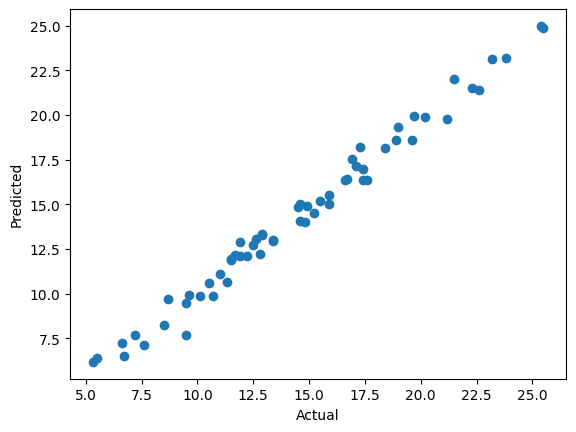

In [17]:
plt.scatter(y,y1)
plt.xlabel('Actual')
plt.ylabel('Predicted')